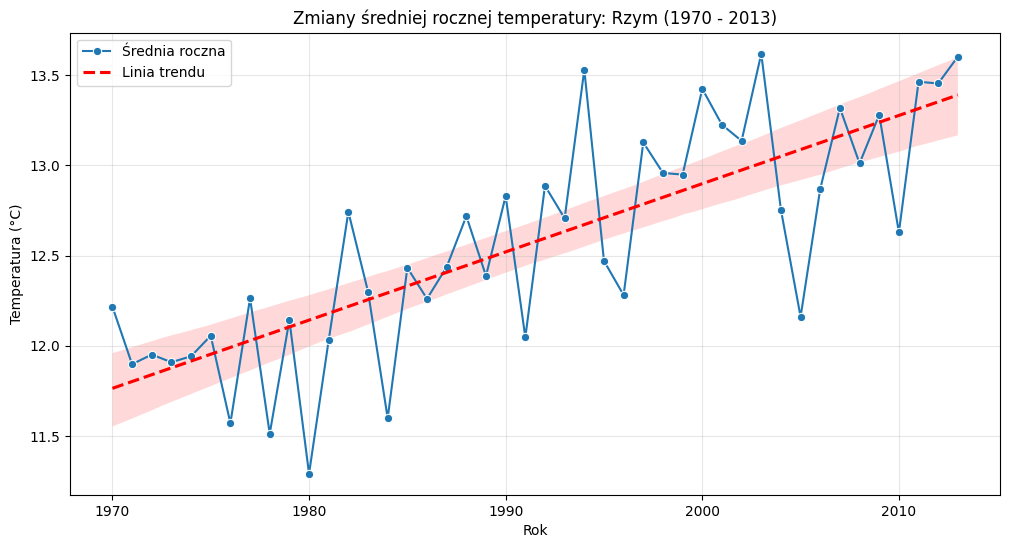

--- Rzym ---
Średnia temp. 1970-1990: 12.12°C
Średnia temp. 2000-2013: 13.14°C
Różnica: +1.02°C


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'GlobalLandTemperaturesByMajorCity.csv'

try:
    df = pd.read_csv(file_path)
    city_df = df[df['City'] == 'Rome'].copy()

    if city_df.empty:
        print("Nie znaleziono danych dla miasta Rome.")
    else:
        city_df['dt'] = pd.to_datetime(city_df['dt'])
        
        mask = (city_df['dt'] >= '1970-01-01') & (city_df['dt'] <= '2013-12-31')
        city_df = city_df.loc[mask]
        city_df = city_df.dropna(subset=['AverageTemperature'])

        city_df['Year'] = city_df['dt'].dt.year
        annual_avg = city_df.groupby('Year')['AverageTemperature'].mean().reset_index()

        plt.figure(figsize=(12, 6))
        sns.lineplot(data=annual_avg, x='Year', y='AverageTemperature', label='Średnia roczna', marker='o')
        sns.regplot(data=annual_avg, x='Year', y='AverageTemperature', 
                    scatter=False, color='red', label='Linia trendu', line_kws={"linestyle": "--"})

        plt.title('Zmiany średniej rocznej temperatury: Rzym (1970 - 2013)')
        plt.xlabel('Rok')
        plt.ylabel('Temperatura (°C)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        period_1 = annual_avg[(annual_avg['Year'] >= 1970) & (annual_avg['Year'] <= 1990)]
        period_2 = annual_avg[(annual_avg['Year'] >= 2000) & (annual_avg['Year'] <= 2013)]

        avg_1 = period_1['AverageTemperature'].mean()
        avg_2 = period_2['AverageTemperature'].mean()
        diff = avg_2 - avg_1

        print("--- Rzym ---")
        print(f"Średnia temp. 1970-1990: {avg_1:.2f}°C")
        print(f"Średnia temp. 2000-2013: {avg_2:.2f}°C")
        print(f"Różnica: {diff:+.2f}°C")

except FileNotFoundError:
    print(f"Nie znaleziono pliku: {file_path}")
except Exception as e:
    print(f"Błąd: {e}")